## Title

# Sentiment Analysis of Twitter Data

## Table of Contents

##### 1.Title

##### 2.Sentiment Analysis of Twitter Data

##### 3.Overview of Problem Statement

##### 4.Objective

##### 5.Importing Necessary Libraries

##### 6.Data Collection

##### 7.Data Description

##### 8.Exploratory Data Analysis (EDA)

##### 9.Preprocessing

##### 10.Visualization

##### 11.Feature Engineering

##### 12.Data Splitting

##### 13.Vectorize the Text Data using TF-IDF

##### 14.Building the Model

##### 15.Finding the Best Model

##### 16.Representing the Best Model on Heatmap

##### 17.Explore and Preprocess the Test Data

##### 18.Predict Sentiment Labels on Test Data

##### 19.Model Evaluation on Validation Data

##### 20.Model Testing

##### 21.Result

##### 22.Conclusion



## Overview of Problem Statement


#### Social media, especially Twitter, is a key platform where people express opinions on topics and brands. This project focuses on analyzing tweet sentiments to understand public attitudes and trends.




## Objective


#### The goal is to clean and analyze Twitter data, classify tweets by sentiment (Positive, Negative, Neutral), remove irrelevant data, and visualize patterns to reveal public opinion on specific topics or brands.


## Importing necessary libraries

In [1]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string
import re
import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer



from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier


from nltk.corpus import stopwords
from wordcloud import WordCloud



from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
import warnings 
warnings.filterwarnings('ignore')

##  Data collection

In [3]:
# Loading the dataset
file_path = 'twitter_training.csv'
df = pd.read_csv(file_path)


In [4]:
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
# Renaming columns for clarity
df.columns = ['ID', 'Topic', 'Sentiment', 'Text']

In [6]:
df

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


## Data Description

In [7]:
df.shape

(74681, 4)

##### The dataset contains 74681 rows and 4 columns.

## EDA

In [8]:
# Display the columns of the dataset
columns = df.columns
print("Columns in the dataset:",columns)

Columns in the dataset: Index(['ID', 'Topic', 'Sentiment', 'Text'], dtype='object')


In [9]:
# Numerical columns
numerical_features = df.select_dtypes(include='int').columns
print(numerical_features)

Index(['ID'], dtype='object')


In [10]:
# Categorical columns
categorical_features= df.select_dtypes(include=['object','datetime']).columns
print(categorical_features)

Index(['Topic', 'Sentiment', 'Text'], dtype='object')


In [11]:
# Get a summary of the dataset
df.info

<bound method DataFrame.info of          ID        Topic Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

                                                    Text  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition of my...  
74677  Just realized that my Mac window

In [12]:
# Display statistical summary for all columns within the dataFram
df.describe(include='all')

,ID,Topic,Sentiment,Text
count,74681.000000,74681,74681,73995
unique,NaN,32,4,69490
top,NaN,TomClancysRainbowSix,Negative,
freq,NaN,2400,22542,172
mean,6432.640149,NaN,NaN,NaN
std,3740.423819,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


In [13]:
# Describe the numerical features
print("Statistical description of numerical features:")
df.describe()

Statistical description of numerical features:


,ID
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [14]:
df.duplicated().sum()

2700

In [15]:
df.shape

(74681, 4)

In [16]:
# Check for Null Values 
print("Checking for missing values:")
print(df.isnull().sum())

Checking for missing values:
ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64


<Axes: >

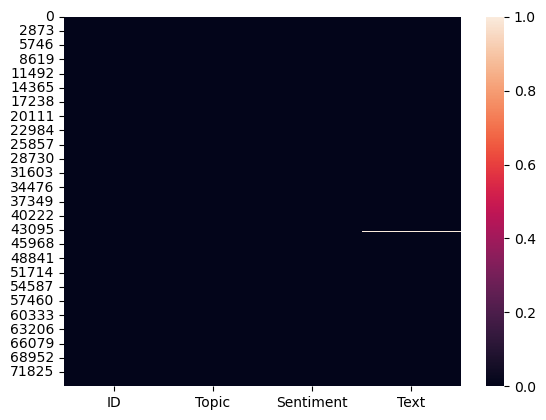

In [17]:
sns.heatmap(df.isna())

In [18]:
# Calculating and displaying the number of unique values
print("Unique Values Count:")
print(f"Topic: {df['Topic'].nunique()}")
print(f"Sentiment: {df['Sentiment'].nunique()}")


Unique Values Count:
Topic: 32
Sentiment: 4


## Preprocessing

In [19]:
# Remove duplicate rows
df = df.drop_duplicates()

In [20]:
df.shape

(71981, 4)

In [21]:
# Remove rows where the sentiment is labeled as 'Irrelevant'
df = df[df['Sentiment'] != 'Irrelevant']


In [22]:
# Handling missing values (Removing rows with missing text)
df.dropna(subset=['Text'], inplace=True)

In [23]:
# Text Preprocessing Function with Enhancements
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = text.translate(str.maketrans('', '', string.punctuation))  # Removing punctuation
    text = re.sub(r"\d+", "", text)  # Removing numerical values
    text = re.sub(r"\s+", " ", text).strip()  # Removing extra spaces
    words = text.split()  # Tokenizing
    words = [word for word in words if word not in stopwords.words('english')]  # Removing stopwords
    return ' '.join(words)

In [24]:
# Applying text preprocessing
# Applying text preprocessing and renaming the column to 'Cleaned_Text'
df['Cleaned_Text'] = df['Text'].apply(preprocess_text)
df.drop(columns=['Text'], inplace=True)


In [25]:
df.head

<bound method NDFrame.head of          ID        Topic Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

                                            Cleaned_Text  
0                                    coming borders kill  
1                            im getting borderlands kill  
2                           im coming borderlands murder  
3                          im getting borderlands murder  
4                          im getting borderlands murder  
...                                                  ...  
74676  realized windows partition mac like years behi...  
74677  realized mac window partition year

## Visualization

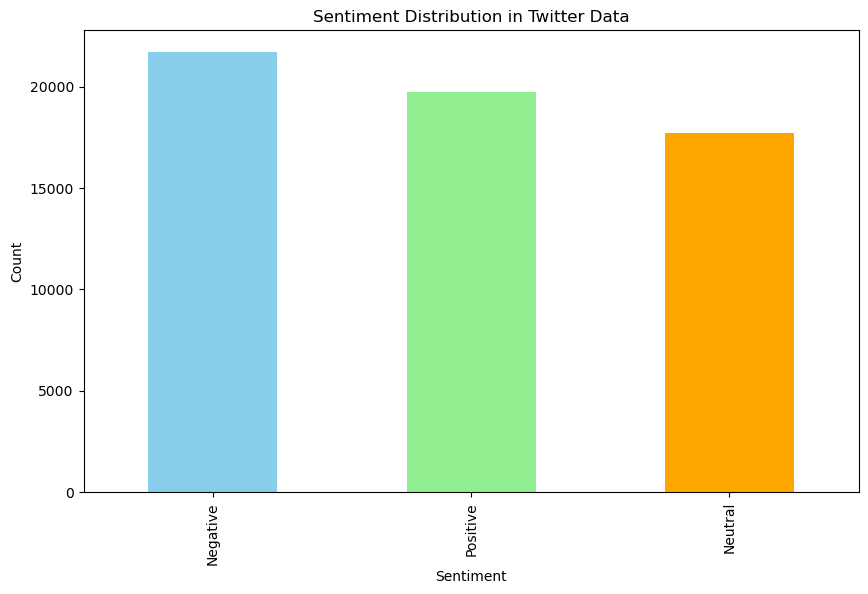

In [26]:

# Visualizing the distribution of sentiments
plt.figure(figsize=(10,6))
df['Sentiment'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen', 'orange', 'red'])
plt.title('Sentiment Distribution in Twitter Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


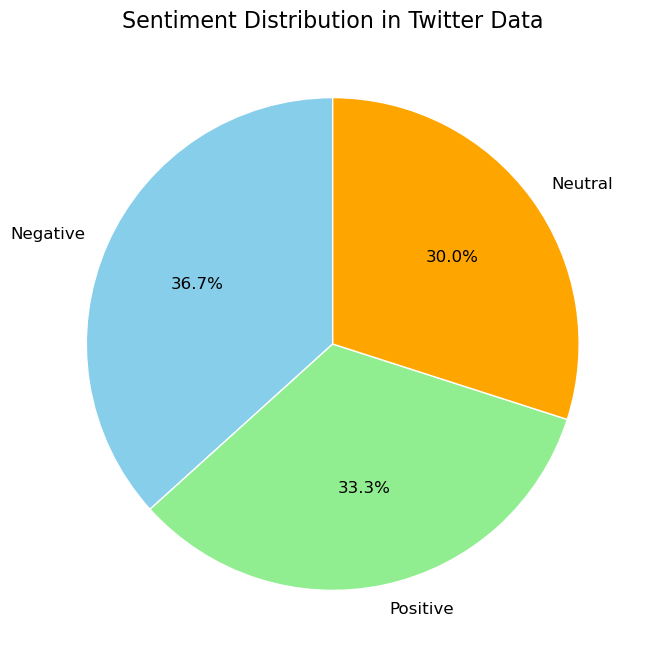

In [27]:

# Generating a pie chart for sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()

# Enhanced Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightgreen', 'orange', 'red'],  # Custom colors
    textprops={'fontsize': 12},  # Text size for better readability
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Sentiment Distribution in Twitter Data', fontsize=16)
plt.show()

In [28]:
# Function for Word Cloud Generation
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

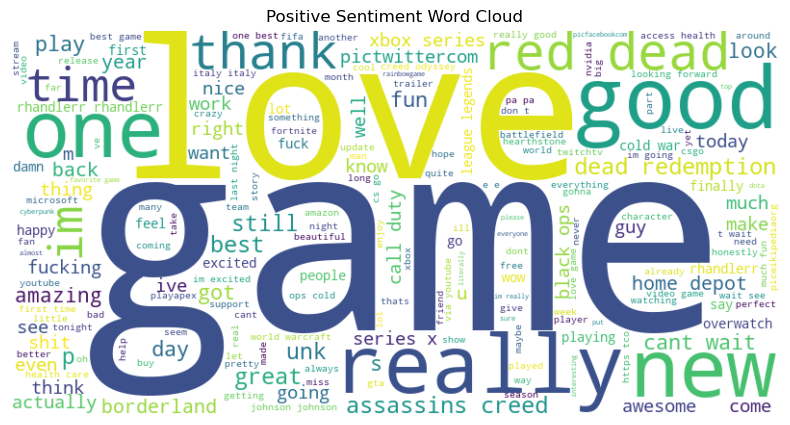

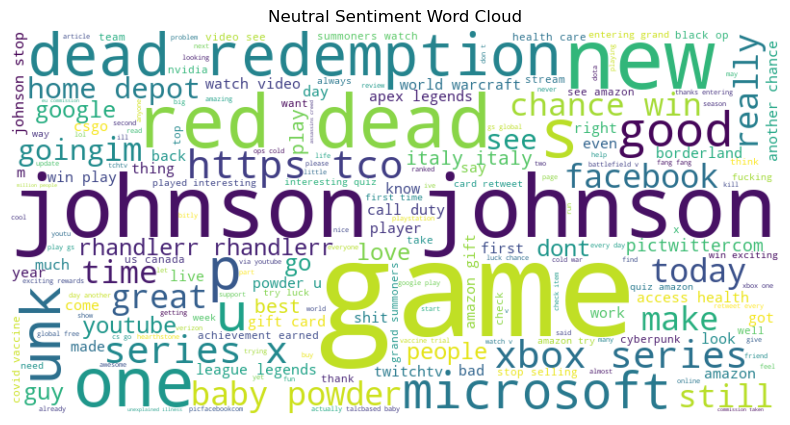

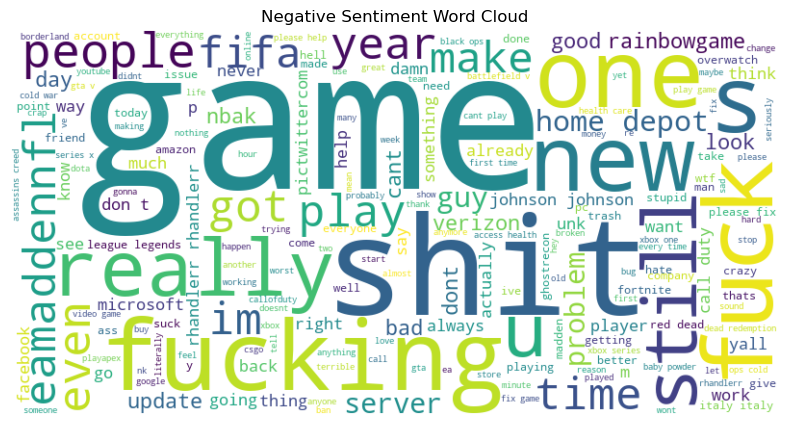

In [29]:
# Generating Word Clouds for each sentiment
for sentiment in df['Sentiment'].unique():
    sentiment_text = ' '.join(df[df['Sentiment'] == sentiment]['Cleaned_Text'])
    generate_wordcloud(sentiment_text, f'{sentiment} Sentiment Word Cloud')


## Feature Engineering

In [30]:
label = LabelEncoder()
df['Sentiment'] = label.fit_transform(df['Sentiment'])

## Data Splitting

In [31]:
X = df['Cleaned_Text']
y  = df['Sentiment']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Vectorize the text data using TF-IDF

In [33]:
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,3)) 
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

## Building Model

In [34]:
models_dict = {
    'LogisticRegression': LogisticRegression(max_iter=10_000),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'XGBClassifier': XGBClassifier()
}

## Find the best Model

In [35]:
results = []


for name, model in models_dict.items():
    print(f"\nTraining: {name}")
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)
    
    results.append({'Model': name, 'Accuracy': acc, 'Confusion Matrix': confusion_matrix(y_test, y_pred)})

    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=label.classes_))


Training: LogisticRegression
Accuracy: 0.7756
              precision    recall  f1-score   support

    Negative       0.81      0.82      0.82      6602
     Neutral       0.73      0.71      0.72      5291
    Positive       0.78      0.78      0.78      5843

    accuracy                           0.78     17736
   macro avg       0.77      0.77      0.77     17736
weighted avg       0.78      0.78      0.78     17736


Training: KNeighborsClassifier
Accuracy: 0.8411
              precision    recall  f1-score   support

    Negative       0.85      0.87      0.86      6602
     Neutral       0.84      0.81      0.83      5291
    Positive       0.83      0.83      0.83      5843

    accuracy                           0.84     17736
   macro avg       0.84      0.84      0.84     17736
weighted avg       0.84      0.84      0.84     17736


Training: DecisionTreeClassifier
Accuracy: 0.8042
              precision    recall  f1-score   support

    Negative       0.84      0.82   

## Representing the best model on heatmap

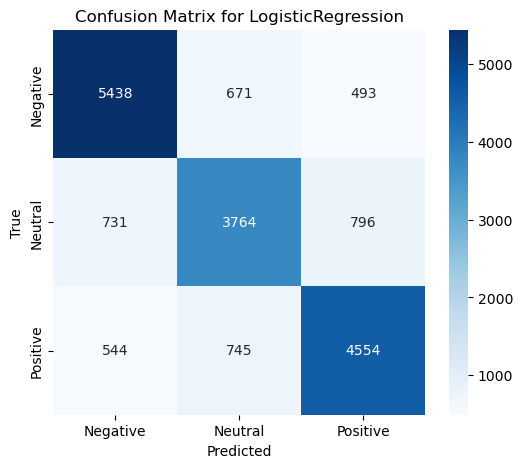

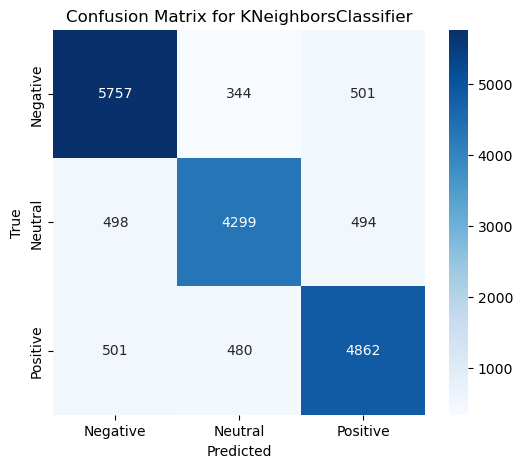

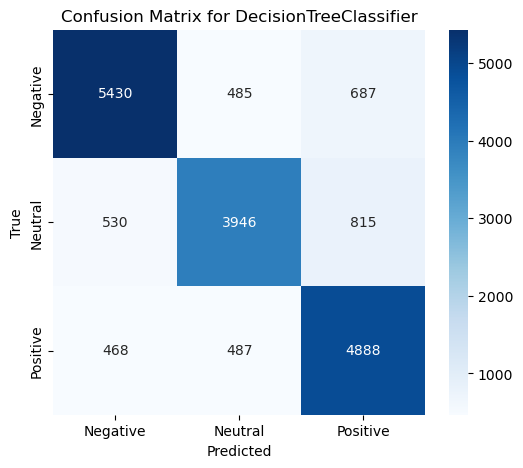

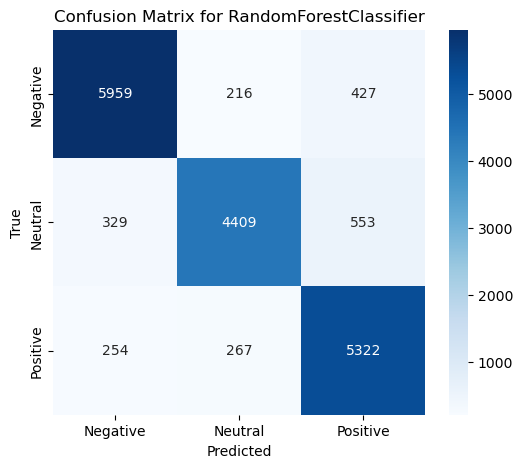

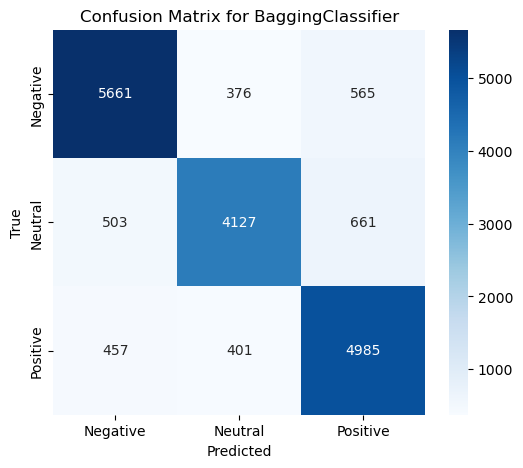

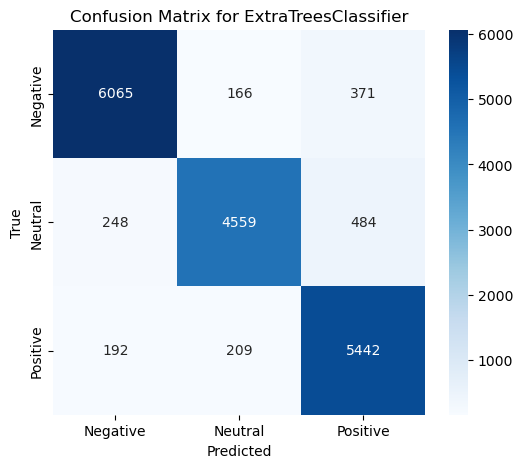

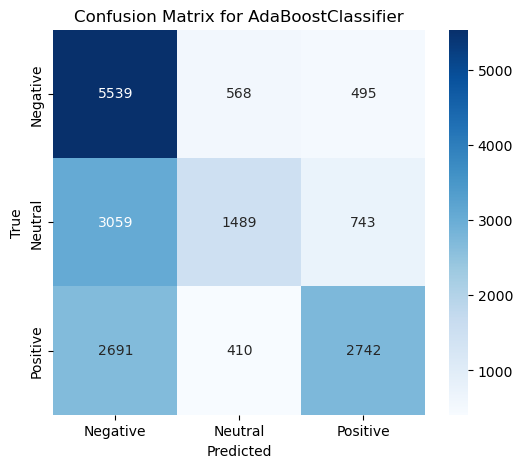

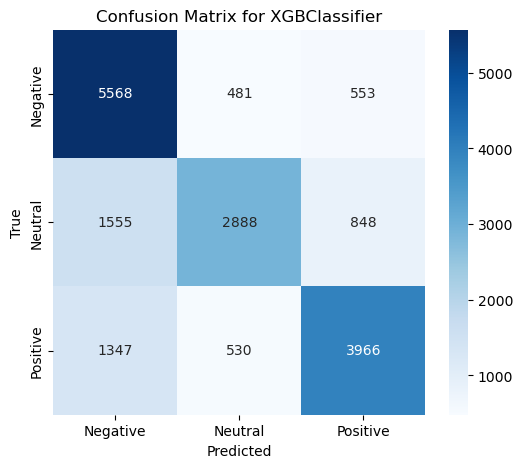


Summary of Model Performances:
                    Model  Accuracy
0      LogisticRegression  0.775598
1    KNeighborsClassifier  0.841114
2  DecisionTreeClassifier  0.804240
3  RandomForestClassifier  0.884641
4       BaggingClassifier  0.832939
5    ExtraTreesClassifier  0.905841
6      AdaBoostClassifier  0.550857
7           XGBClassifier  0.700383


In [36]:
for result in results:
    name = result['Model']
    cm = result['Confusion Matrix']
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label.classes_, yticklabels=label.classes_)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

results_df = pd.DataFrame(results)
print("\nSummary of Model Performances:")
print(results_df[['Model', 'Accuracy']])

## Explore the test data  and Preprocessing

In [37]:
# Loading the dataset
file_path = 'twitter_validation.csv'
df_valid = pd.read_csv(file_path)


In [38]:
df_valid

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [39]:
# Renaming columns for clarity
df_valid.columns = ['ID', 'Topic', 'Sentiment', 'Text']

In [40]:
df_valid =df_valid[df_valid['Sentiment'] != 'Irrelevant']

In [41]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 828 entries, 0 to 998
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         828 non-null    int64 
 1   Topic      828 non-null    object
 2   Sentiment  828 non-null    object
 3   Text       828 non-null    object
dtypes: int64(1), object(3)
memory usage: 32.3+ KB


In [42]:
df_valid.isna().sum()

ID           0
Topic        0
Sentiment    0
Text         0
dtype: int64

In [43]:
df_valid.describe()

,ID
count,828.000000
mean,6474.440821
std,3722.782810
min,6.000000
25%,3205.500000
50%,6800.500000
75%,9667.500000
max,13197.000000


In [44]:
df_valid.duplicated().sum()

0

In [45]:
df_valid.shape

(828, 4)

<Axes: >

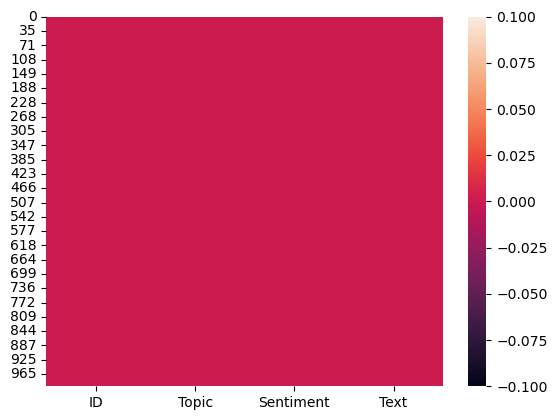

In [46]:
sns.heatmap(df_valid.isna())

In [47]:
df_valid

,ID,Topic,Sentiment,Text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
992,314,Amazon,Negative,Please explain how this is possible! How can t...
993,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [48]:
df_valid.isna().sum()

ID           0
Topic        0
Sentiment    0
Text         0
dtype: int64

In [49]:
# Handling missing values (Removing rows with missing text)
df_valid.dropna(subset=['Text'], inplace=True)

In [50]:
# Text Preprocessing Function with Enhancements
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = text.translate(str.maketrans('', '', string.punctuation))  # Removing punctuation
    text = re.sub(r"\d+", "", text)  # Removing numerical values
    text = re.sub(r"\s+", " ", text).strip()  # Removing extra spaces
    words = text.split()  # Tokenizing
    words = [word for word in words if word not in stopwords.words('english')]  # Removing stopwords
    return ' '.join(words)

In [51]:
# Applying text preprocessing
# Applying text preprocessing and renaming the column to 'Cleaned_Text'
df_valid['Cleaned_Text'] =df_valid['Text'].apply(preprocess_text)
df_valid.drop(columns=['Text'], inplace=True)


In [52]:
df_valid

,ID,Topic,Sentiment,Cleaned_Text
0,352,Amazon,Neutral,bbc news amazon boss jeff bezos rejects claims...
1,8312,Microsoft,Negative,microsoft pay word functions poorly samsungus ...
2,4371,CS-GO,Negative,csgo matchmaking full closet hacking truly awf...
3,4433,Google,Neutral,president slapping americans face really commi...
4,6273,FIFA,Negative,hi eahelp i’ve madeleine mccann cellar past ye...
...,...,...,...,...
992,314,Amazon,Negative,please explain possible let companies overchar...
993,9701,PlayStation5(PS5),Positive,good sony much want see new ps whats going rig...
996,2652,Borderlands,Positive,today sucked it’s time drink wine n play borde...
997,8069,Microsoft,Positive,bought fraction microsoft today small wins


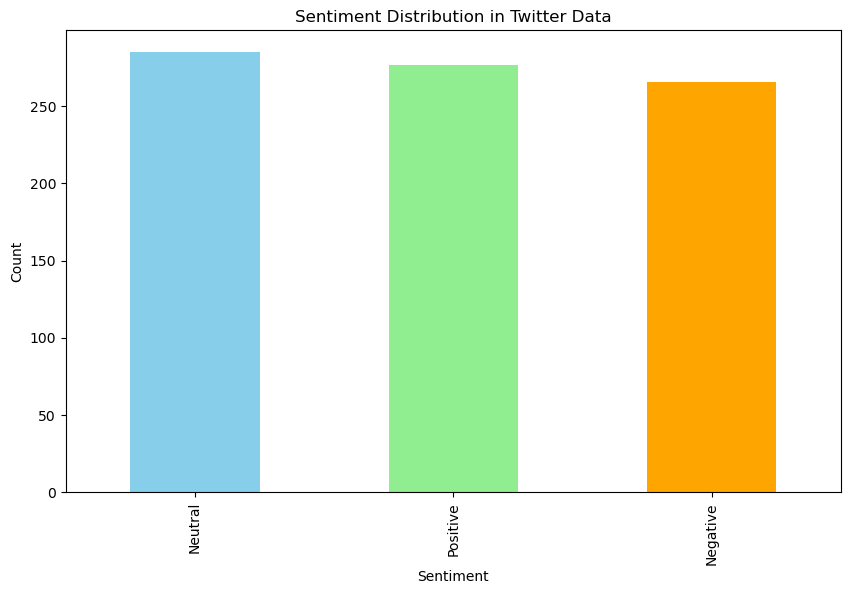

In [53]:

# Visualizing the distribution of sentiments
plt.figure(figsize=(10,6))
df_valid['Sentiment'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen', 'orange', 'red'])
plt.title('Sentiment Distribution in Twitter Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [54]:
# Function for Word Cloud Generation
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

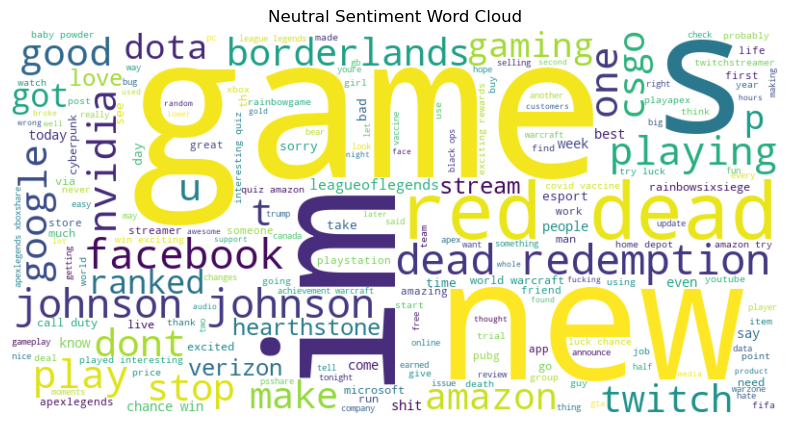

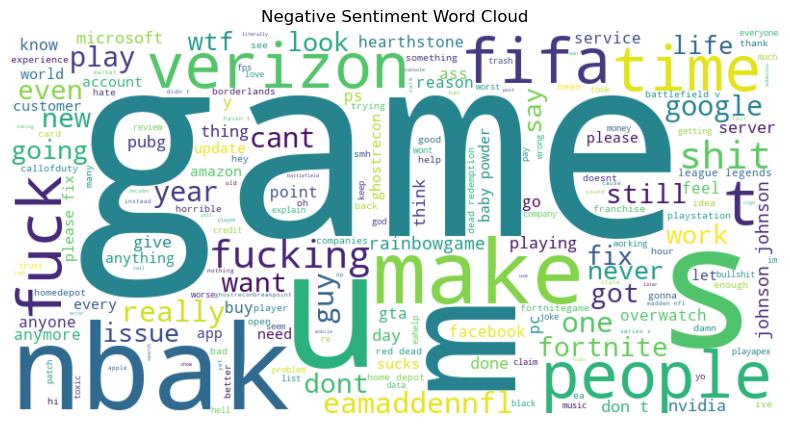

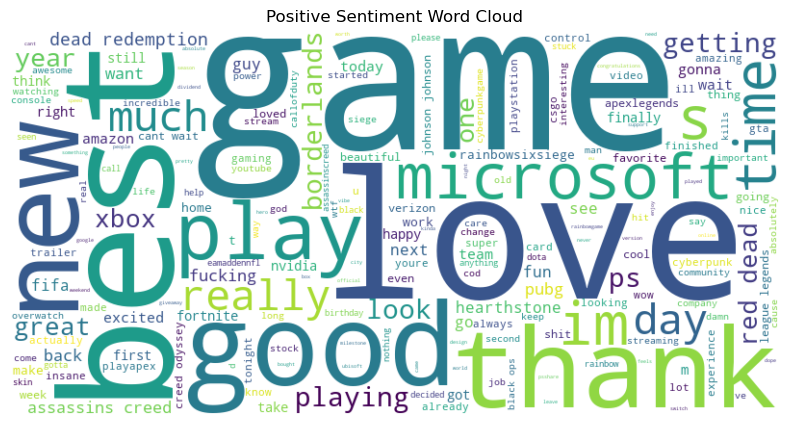

In [55]:
# Generating Word Clouds for each sentiment
for sentiment in df_valid['Sentiment'].unique():
    sentiment_text = ' '.join(df_valid[df_valid['Sentiment'] == sentiment]['Cleaned_Text'])
    generate_wordcloud(sentiment_text, f'{sentiment} Sentiment Word Cloud')


In [56]:
label = LabelEncoder()
df_valid['Sentiment'] = label.fit_transform(df_valid['Sentiment'])

In [57]:
X_valid = df_valid['Cleaned_Text']

In [58]:
X_valid_vec = vectorizer.transform(X_valid)
y_valid = df_valid['Sentiment']

## Predict sentiment labels for the test data using the best trained model

In [59]:
best_model = ExtraTreesClassifier()
best_model.fit(X_train_vec, y_train)

ExtraTreesClassifier()

In [60]:
y_pred = best_model.predict(X_test_vec)
y_pred

array([0, 2, 2, ..., 0, 1, 0])

In [61]:
y_pred

array([0, 2, 2, ..., 0, 1, 0])

## Evaluate the best model on validation data and display accuracy and classification report

In [62]:
y_val_pred = best_model.predict(X_valid_vec)


val_acc = accuracy_score(y_valid, y_val_pred)
print(f"Validation Accuracy: {val_acc:.4f}")
print("Validation Classification Report:")
print(classification_report(y_valid, y_val_pred, target_names=label.classes_))

Validation Accuracy: 0.9601
Validation Classification Report:
              precision    recall  f1-score   support

    Negative       0.97      0.97      0.97       266
     Neutral       0.97      0.94      0.95       285
    Positive       0.94      0.97      0.96       277

    accuracy                           0.96       828
   macro avg       0.96      0.96      0.96       828
weighted avg       0.96      0.96      0.96       828



##  Model Testing

In [63]:
def test_model (text): 
    test_word = [text] 
    
    test_word_vec = vectorizer.transform(test_word)
    
    prediction = best_model.predict(test_word_vec)
    predicted_label = label.inverse_transform([prediction[0]])[0]
    
    print(f"Prediction for the test word: {predicted_label}")

In [64]:
test_model("I absolutely love this product, it's amazing")

Prediction for the test word: Positive


In [65]:
test_model("I hate how slow and buggy this app is")

Prediction for the test word: Negative


In [71]:
test_model("This laptop is red")

Prediction for the test word: Neutral


## Result


##### The analysis showed clear sentiment trends. Some brands had mostly positive tweets, while others faced negativity. Visualizations like pie and bar charts highlighted these patterns and helped track sentiment shifts.





## Conclusion


#### Twitter sentiment analysis revealed valuable insights into public opinion. These findings can help brands improve strategies, monitor reputation, and respond to public feedback more effectively.
